In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html 
from scipy import stats
import re
import os

In [2]:
#Benodigde files inladen in een dictionary
df_electricity = dict()
for file in os.listdir("C:/Users/erhan/Documents/School/Windesheim jaar 3/Semester 2/Electricity/"):
    company = file.split('_')[0]
    year = re.findall('2+[0-9]+',file.split('_')[2])[0]
    df_electricity[company+year] = pd.read_csv("C:/Users/erhan/Documents/School/Windesheim jaar 3/Semester 2/Electricity/"+file)


In [3]:
#Keys voor elk file binnen de dictionary
df_electricity.keys(),len(df_electricity)

(dict_keys(['enexis2010', 'enexis2011', 'enexis2012', 'enexis2013', 'enexis2014', 'enexis2015', 'enexis2016', 'enexis2017', 'enexis2018', 'enexis2019', 'liander2009', 'liander2010', 'liander2011', 'liander2012', 'liander2013', 'liander2014', 'liander2015', 'liander2016', 'liander2017', 'liander2018', 'liander2019', 'stedin2009', 'stedin2010', 'stedin2011', 'stedin2012', 'stedin2013', 'stedin2014', 'stedin2015', 'stedin2016', 'stedin2017', 'stedin2018', 'stedin2019']),
 32)

In [4]:
#10 grootste steden van Nederland verzamelen uit de data
grootste_steden = ['AMSTERDAM','ROTTERDAM',"'S-GRAVENHAGE",'UTRECHT','EINDHOVEN','TILBURG','ALMERE','GRONINGEN','BREDA','NIJMEGEN']

In [5]:
#Jaarlijks verbruik van elektriciteit per stad
col1,col2,col3,col4 = [],[],[],[]
for net_manager in df_electricity.keys():
    for city in df_electricity[net_manager].groupby('city').sum().index.values:
        if city in grootste_steden:
            value = df_electricity[net_manager].groupby('city').sum().annual_consume[city]   
            col1.append(re.findall('^[a-z]+',net_manager)[0])
            col2.append(re.findall('[0-9]+',net_manager)[0])
            col3.append(city)
            col4.append(value)
            
d={'net_manager': col1,
    'year': col2,
    'city': col3,
    'annual_consume': col4}

table = pd.DataFrame.from_dict(data=d)

In [6]:
#Overzicht in tabel weergeven
table_yearcity = table.groupby(['year','city']).sum()['annual_consume'].unstack(level=1)
table_yearcity

city,'S-GRAVENHAGE,ALMERE,AMSTERDAM,BREDA,EINDHOVEN,GRONINGEN,NIJMEGEN,ROTTERDAM,TILBURG,UTRECHT
year,,,,,,,,,,
2009,40573403.0,18315331.0,53900122.0,NaN,NaN,NaN,14321799.0,38022704.0,NaN,22037486.0
2010,40996950.0,18736494.0,54290067.0,12377692.00,31510.00,15534663.00,14517535.0,38366903.0,14490575.00,22101713.0
2011,41290159.0,19009259.0,54305845.0,12434509.00,30365.00,15711535.00,14485133.0,38584201.0,14542268.00,22366586.0
2012,41531382.0,19212245.0,54422131.0,12579225.00,30008.00,15889435.00,14613953.0,38813483.0,14776182.00,22663271.0
2013,41187101.0,19238127.0,54733755.0,12449262.00,50632.00,16246745.00,14633098.0,38490463.0,14559312.00,22588350.0
2014,41096176.0,18724981.0,55092954.0,12376799.00,56218.00,16195745.00,14354127.0,38396624.0,14423901.00,22499621.0
2015,40013042.0,18136934.0,53253124.0,12098145.00,56355.00,15743630.00,13871545.0,37320188.0,14021883.00,22298750.0
2016,39594997.0,17774172.0,55832552.0,11825999.00,74719.00,15298791.00,13755818.0,36699445.0,13464430.00,22266926.0
2017,39570695.0,17562872.0,55438717.0,11671961.00,16989602.00,15054696.00,13527664.0,36398520.0,13431107.00,22225266.0


In [34]:
#Aansluitingen per stad per jaar
col1,col2,col3 = [],[],[]
        
for i in df_electricity.keys():
    counts = df_electricity[i].groupby('city').num_connections.sum().values
    cities = df_electricity[i].groupby('city').num_connections.sum().index
    year = re.findall('[0-9]+',i)[0]
    for city,count in zip(cities,counts):
        if city in grootste_steden:
            col1.append(year)
            col2.append(city)
            col3.append(count)
            
d={ 'year': col1,
    'city': col2,
    'n_connections': col3}

table_n_conn = pd.DataFrame.from_dict(data=d)

In [35]:
#Gegevens weergeven in tabel
table_n_connections = table_n_conn.groupby(['year','city']).sum()['n_connections'].unstack(0)
table_n_connections

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
city,,,,,,,,,,,
'S-GRAVENHAGE,256251.0,260313.0,262661.0,263669.0,263840.0,265328.0,266505.0,269137.0,271816.0,279399.0,265832.0
ALMERE,81143.0,83368.0,85305.0,86922.0,88354.0,88231.0,88988.0,90100.0,91712.0,93732.0,96213.0
AMSTERDAM,431065.0,439282.0,444998.0,450136.0,455878.0,457652.0,463182.0,493704.0,501991.0,510411.0,519079.0
BREDA,NaN,65189.0,65941.0,67834.0,69456.0,70289.0,70548.0,70633.0,71595.0,72550.0,72705.0
EINDHOVEN,NaN,565.0,570.0,569.0,1296.0,1385.0,1391.0,1381.0,108925.0,111080.0,112253.0
GRONINGEN,NaN,88889.0,89906.0,92009.0,95249.0,95843.0,96042.0,96556.0,97042.0,98557.0,99112.0
NIJMEGEN,74874.0,75643.0,76435.0,77637.0,78841.0,79316.0,79794.0,80607.0,81918.0,83267.0,84405.0
ROTTERDAM,293793.0,296972.0,299521.0,301746.0,302389.0,307042.0,308719.0,310852.0,313134.0,316547.0,299323.0
TILBURG,NaN,81416.0,82249.0,84113.0,84818.0,85339.0,85709.0,85758.0,87130.0,88619.0,89739.0


In [11]:
#landelijke aansluitingen per jaar
year_conn_cons =pd.DataFrame({'year':table_n_connections.sum().index,\
              'n_connections':table_n_connections.sum().values,\
              'annual_consume':table_yearcity.T.sum().values})
year_conn_cons

,year,n_connections,annual_consume
0,2009,1265508.0,1.871708e+08
1,2010,1520321.0,2.314441e+08
2,2011,1538416.0,2.327599e+08
3,2012,1557096.0,2.345313e+08
4,2013,1573921.0,2.341768e+08
5,2014,1585546.0,2.332171e+08
6,2015,1597882.0,2.268136e+08
7,2016,1638124.0,2.265878e+08
8,2017,1767669.0,2.418711e+08
9,2018,1802283.0,2.447662e+08


slope: 86.5170496100067 intercept: 91332419.01441973


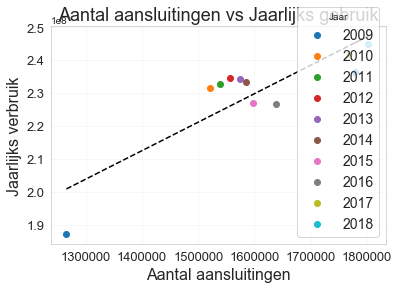

In [28]:
#Aantal aansluitingen per jaar vs jaarlijks elektrisch verbruik
plt.grid(color='whitesmoke')

xi=year_conn_cons.n_connections
y=year_conn_cons.annual_consume

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
print('slope:',slope,'intercept:',intercept)

for i,j in zip(year_conn_cons.n_connections,year_conn_cons.annual_consume):
    plt.scatter(i,j,label='year')
    plt.legend(title='Jaar',labels=list(range(2009,2019,1)),loc=4,fontsize=14)

plt.plot(xi, line,color='black',linestyle='--')

plt.xlabel('Aantal aansluitingen',{'size':'16'})
plt.ylabel('Jaarlijks verbruik',{'size':'16'})
plt.title('Aantal aansluitingen vs Jaarlijks gebruik',{'size':'18'})
plt.tick_params(axis='both', labelsize=13)

plt.show()

In [13]:
#Overzicht maken van steden waar elektriciteit wordt opgewekt
data_not100,data_100,list_year = [],[],[]

for net_manager in sorted(df_electricity.keys()):
    for city in grootste_steden:
        try:
            year = re.findall('[0-9]+',net_manager)[0]
            data = df_electricity[net_manager].groupby(['city','delivery_perc'])\
            .count()['net_manager'].unstack(level=0)[city]
            list_year.append(year)
            data_not100.append(data[data.index!=100].sum())
            data_100.append(data[data.index==100].values[0])
        except:
            pass


In [14]:
data_plot = pd.DataFrame({"year":list_year,"100":data_100,"Not 100":data_not100})
data_plot[data_plot.year=='2010']

,year,100,Not 100
0,2010,11.0,0.0
1,2010,3333.0,18.0
2,2010,4228.0,74.0
3,2010,2577.0,8.0
46,2010,15004.0,141.0
47,2010,4.0,0.0
48,2010,1.0,0.0
49,2010,1.0,0.0
50,2010,3989.0,97.0
51,2010,3385.0,77.0


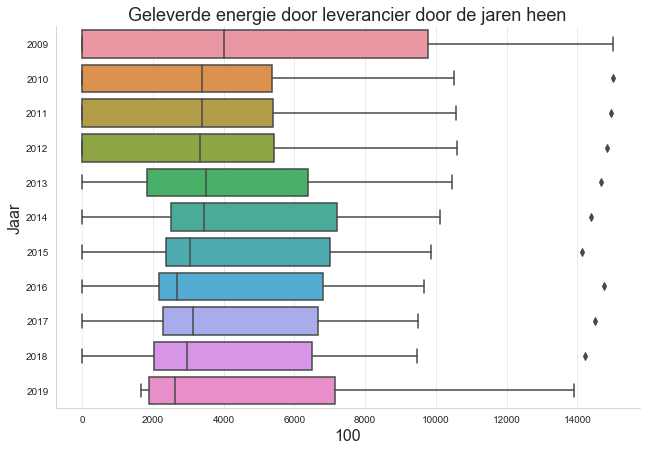

In [33]:
#Energielevering in %
sns.set_style("whitegrid",{'grid.color': '.9'})
sns.catplot(x="100", y="year", kind="box", orient="h", height=6, aspect=1.5,data=data_plot)
plt.xlabel('100',{'size':'16'})
plt.ylabel('Jaar',{'size':'16'})
plt.title('Geleverde energie door leverancier door de jaren heen',{'size':'18'});

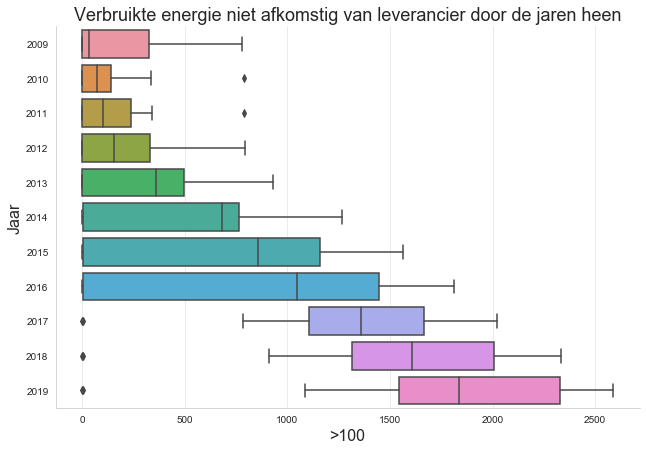

In [26]:
sns.set_style("whitegrid",{'grid.color': '.9'})
sns.catplot(x="Not 100", y="year", kind="box", orient="h", height=6,aspect=1.5, data=data_plot)
plt.xlabel('>100',{'size':'16'})
plt.ylabel('Jaar',{'size':'16'})
plt.title('Verbruikte energie niet afkomstig van leverancier door de jaren heen',{'size':'18'});

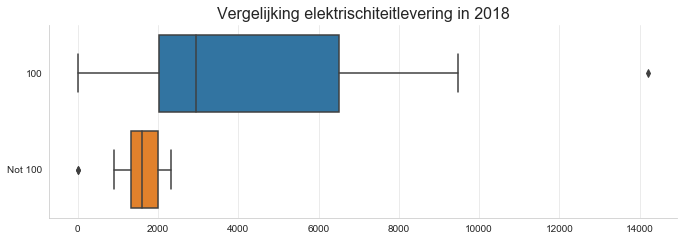

In [17]:
d2018 = data_plot[data_plot.year=='2018']
sns.set_style("whitegrid",{'grid.color': '.9'})
sns.catplot(data=d2018[['100','Not 100']],kind="box", orient="h", height=3.2, aspect=3)
plt.title('Vergelijking elektriciteitlevering in 2018',{'size':'16'});